### Real-Estate House Price Predictation using Navie_bayes classification and K-fold cross validatataion:

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
df = pd.read_csv("dataset_ori.csv")

In [21]:
df

,Home,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood,Price
0,1,1790,2,2,2,East,114300
1,2,2030,4,2,3,East,114200
2,3,1740,3,2,1,East,114800
3,4,1980,3,2,3,East,94700
4,5,2130,3,3,3,East,119800
...,...,...,...,...,...,...,...
462,463,1650,3,2,2,North,107300
463,464,2040,3,3,3,East,125700
464,465,2140,3,3,2,North,144200
465,466,1900,2,2,2,East,106900


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])

In [23]:
df.head()

,Home,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood,Price
0,1,1790,2,2,2,0,114300
1,2,2030,4,2,3,0,114200
2,3,1740,3,2,1,0,114800
3,4,1980,3,2,3,0,94700
4,5,2130,3,3,3,0,119800


In [24]:
df.isnull().sum()

Home            0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Neighborhood    0
Price           0
dtype: int64

In [25]:
# Split the data into features (X) and target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [57]:
kfold = KFold(n_splits=11, shuffle=True, random_state=0)

In [58]:
accuracy_scores = []

In [59]:
for train_index, test_index in kfold.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = GaussianNB()
    model.fit(X_train, y_train)
      
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)

In [60]:
mean_accuracy = np.mean(accuracy_scores)
print("Mean accuracy score:", mean_accuracy*100)

Mean accuracy score: 69.78254303835699


In [61]:
print(accuracy_score(y_test, y_pred)*100)

76.19047619047619


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       81300       0.50      1.00      0.67         1
       82300       1.00      1.00      1.00         1
       90300       0.00      0.00      0.00         1
       93600       1.00      1.00      1.00         1
      100900       1.00      1.00      1.00         1
      102500       1.00      0.50      0.67         2
      103200       0.00      0.00      0.00         0
      104000       0.00      0.00      0.00         1
      105600       0.00      0.00      0.00         0
      107300       0.00      0.00      0.00         1
      108200       0.00      0.00      0.00         1
      108500       0.00      0.00      0.00         0
      110400       1.00      1.00      1.00         1
      111100       1.00      1.00      1.00         1
      117000       1.00      1.00      1.00         1
      117800       0.50      1.00      0.67         1
      119700       1.00      0.50      0.67         2
      120500       1.00    

In [63]:
print(confusion_matrix(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


<AxesSubplot:>

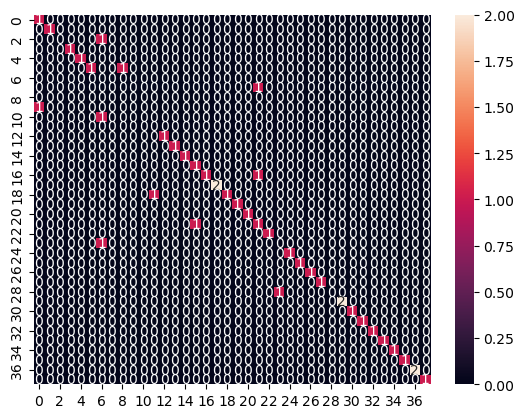

In [64]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot =True, fmt='.2g')

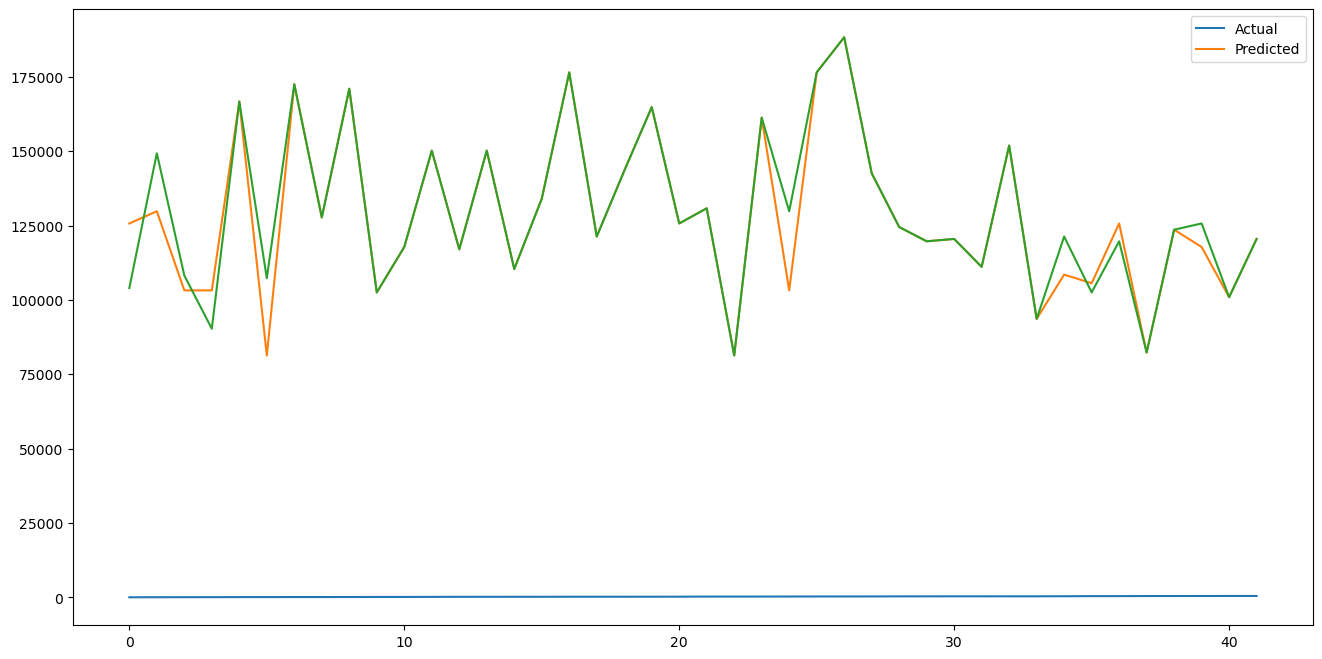

In [65]:
#visualizatation:
test = pd.DataFrame({'Pred_values':y_pred,'Actual':y_test})
fig=plt.figure(figsize=(16,8))
test = test.reset_index()
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

### Price Prediction: 

In [37]:
test = pd.read_csv("test_dataset_ori.csv")

In [38]:
test

,home,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood
0,1,1930,4,2,3,West
1,2,1678,5,5,4,East
2,3,2903,6,3,2,West
3,4,832,3,2,1,North
4,5,8732,2,1,1,West


In [39]:
test["Neighborhood"] = le.fit_transform(test["Neighborhood"])

In [40]:
test

,home,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood
0,1,1930,4,2,3,2
1,2,1678,5,5,4,0
2,3,2903,6,3,2,2
3,4,832,3,2,1,1
4,5,8732,2,1,1,2


In [41]:
y_pred = model.predict(test)

In [42]:
y_pred

array([129800, 125700, 129800, 103200, 103200], dtype=int64)

In [43]:
series = pd.Series(y_pred)
series

0    129800
1    125700
2    129800
3    103200
4    103200
dtype: int64